# Regresión logística con datos MNIST

## Leer datos.

In [39]:
from keras.datasets import mnist
import numpy as np


# load data
(train_x, train_y), (test_x, test_y) = mnist.load_data();

In [40]:
# estudiemos los tamanos de los retornos
print("The size of train_x is : {}".format(train_x.shape))
print("The size of train_y is : {}".format(train_y.shape))
print("The size of test_x is : {}".format(test_x.shape))
print("The size of test_y is : {}".format(test_y.shape))



The size of train_x is : (60000, 28, 28)
The size of train_y is : (60000,)
The size of test_x is : (10000, 28, 28)
The size of test_y is : (10000,)


In [41]:
# reshape de los datos de entrenamiento a tensores de orden 3
train_x = train_x.reshape(train_x.shape[0], 28, 28)
test_x = test_x.reshape(test_x.shape[0], 28, 28)

# normalizamos
train_x = train_x/255.0
test_x = test_x/255.0

train_y.shape

(60000,)

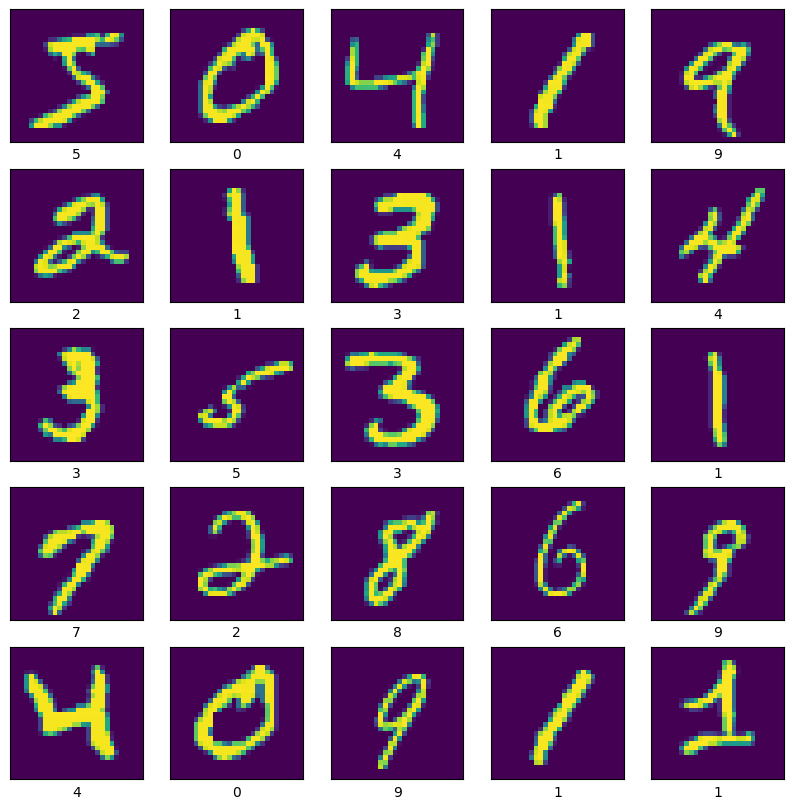

In [42]:
# miremos algunos datos (images)
import matplotlib.pyplot as plt
import numpy
import numpy as np
plt.figure(figsize=(10,10))



# grafique 25 (5 x 5) imagenes
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel("{}".format(train_y[i]))
plt.show();

In [43]:
# reshape the images into 28x28=784
ntrain_x = train_x.reshape(train_x.shape[0], 784)
nttest_x = test_x.reshape(test_x.shape[0], 784)
print(ntrain_x.shape, nttest_x.shape)

(60000, 784) (10000, 784)


In [44]:
# define the sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

#### Vectorizacion de la función de costo

Comenzamos escribiendo una versión vectorizada de la función de costo.
Recuerde que en la regresión logística sin recularización la función
de costo está dada por

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

Para calcular cada elemento en la suma necesitamos computar
$h_\theta(x^{(i)})$ para cada muestra $i$, donde $h_\theta(x^{(i)})= g(\theta^T x^{(i)})$ y $g(z) = \frac{1}{1+e^{-z}}$ es la función logística. Resulta que
podemos calcular esto simultáneamente para todas las muestras usando
multiplicación de matrices. Definamos $X$ y $\theta$ como:


$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}. $$

Entonces, calculamos el producto como:

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$


En la última igualdad usamos el hecho de que $a^Tb = b^Ta$ si $a$ y $b$
son vectores. Esto nos permite calcular los productos $\theta^T x^{(i)}$
para todas las muestras $i$ en una sola línea de código.

#### Vectorización del Gradiente

Recuerde que el gradiente de la función de costo de la regresión logística no regularizada es un vector de cuya $j^{ésima}$ componente está data por


$$ \frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

Para vectorizar esta operación sobre todos los datos comenzamos escribiendo
todas las derivadas parciales con respecto a $\theta_j$ de forma explícita

$$
\begin{align*}
\begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

Donde

$$  h_\theta(x) - y =
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)}
\end{bmatrix} $$

Note que $x^{(i)}$ es un  vector, mientras que $h_\theta\left(x^{(i)}\right) - y^{(i)}$  es un escalar (un número).
Para entender el último paso de la derivación, sea $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ y
observe que:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix}
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & |
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

donde los valores  $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right)$.

La expresión de arriba nos permite calcular todas las derivadas parciales
sin necesidad de ciclos. If usted está cómodo con algebra lineal, lo animamos a trabajar con multiplicacion de matrices para que se convenza de que la versión vectorizada es equivalente a la versión por componentes.

Su trabajo es escribir la función de costo no regularizada `lrCostFunction`
la cual retorna tanto la función de costo como su gradiente $\frac{\partial J}{\partial \theta}$. Su implementación debería suar la estrategia explicada
acá para calcular  $\theta^T x^{(i)}$. Usted debería tambien usar un esquema
vectorizado para el resto de la función de costo. Una función completamente
vectorizada `lrCostFunction`  no debería contener ciclos.



<div class="alert alert-box alert-warning">
Consejo para hacer "Debugging": ** La vectorización algunas veces puede ser
    truculenta. Una estrategia común para hacer "debugging" es imprimir los tamaños de las matrices con las cuales está trabajndo usando la propiedad `shape` de los vectores en `numpy` . Por ejemplo, dada una matriz $X$ de tamaño $100  \times 20$ (100 muestras, por 20 atributos= y $\theta$, un vector de tamaño $20$, usted puede observar que el producto `np.dot(X, theta)` es válido, mientras que el producto `np.dot(theta, X)` no lo es. Además, si usted no tiene una versión vectorizada de su código, compare los dos resultados, los cuales deben ser idénticos.
</div>
<a id="lrCostFunction"></a>

In [45]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula la función de costo usando theta como el parámetro para la
    la regresión logística y el gradiente de costo con respecto a los
    parámetros.


    Parámetros:
    ----------
    theta : vector de parámetros. Con tamaño (n, ), donde n es
            el número de atributos, incluyendo el intercepto.

    X : Vector de muestras
        El conjunto de datos, de tamaño (m x n). m es el número de
        muestras, y n es el número de atributos, includendo el intercepto.


    y : vector de etiquetas.
        Los datos de etiquetas.  Tiene el tamaño  (m, ).

    lambda_ : escalar
        Es el parámetro de regularización.

    Retorna
    -------
    J : escalar
        El valor de la función de costo regularizada.

    grad : vector de derivadas parciales
        Un vector de tamaño  (n, ) que representa el gradiente de
        la función de costo con respecto al vector theta, evaluado
        en el valor actual de theta.

    Instrucciones
    ------------
    Calcula la función de costo para un valor particular de theta. Llámela J.
    Calcula las derivadas parciales y así el gradiente, con respecto a los parámetros
    theta.


    Ayuda 1
    ------
    El cálculo de la función de costo y su gradiente puede ser efectivamente
    vectorizada. Por ejemplo, considere el siguiente cómputo.

        sigmoid(X * theta)

    Cada fila de la matriz resultante contiene el valor de la predicción para
    la muestra correspondiente. Puede usar este hecho para vectorizar la función
    de costo y el cálculo del gradiente.



    Ayuda 2
    ------
    Mientras calcula el gradiente de una función de costo regularizada, hay muchas
    posibles vectorizaciones. Una solución es:

        grad (gradiente de la función de costo no regularizada)
        temp = theta
        temp[0] = 0 # puesto que no sumamos nada a j=0
        grad = grad + SU CODIGO (usando la variable temporal)



    Ayuda  3
    ------
    Acá le mostramos la implementación de la función sigmoid() (ver más arriba).

    """
    #inicialice algunos valores ultiles
    m = y.size

    # convierta etiquetas a enteros si su type es booleano.
    if y.dtype == bool:
        y = y.astype(int)

    # necesita retornar las siguientes variables correctamente
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== SU CODIGO ACA ========================
    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp


    # =============================================================
    return J, grad

#### Vectorización de la regresión logística regularizada

Luego de que usted ha implementado la regresión logística, usted va a agregar
la regularización a la función de costo. Recuerde que la regresión logística
regularizada se define con la ecuación

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Observe que usted no debe regularizar $\theta_0$, usado para el término de sesgo (bias).
Correspondientemente, el vector de derivadas parciales para la regresión logística regularizada está dado por


$$
\begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{for } j  \ge 1
\end{align*}
$$

Usted ahora debe modificar el código `lrCostFunction` in la celda anterior mediante la adición de regulalizaci´on.
Su código no debe usar ciclos.


<div class="alert alert-box alert-warning">
**python/numpy ayuda:** Cuando implementa la vectorización para regresión logística regularizada usted solo debería sumar
    y actualizar  ciertos elementos de  $\theta$. En `numpy`, usted puede indexar matrices para actualizar solo ciertos elementos.
    Por ejemplo, A[:,3:5]=B[:,1:3] reemplaza las columnas con índices 3 a 5 de A con las columnas con índices 1 a 3 de B. Para
    seleccionar columnas (o filas) hasta el final de la matriz, usted debe dejar el lado derecho de los dos puntos en blanco.
    Por ejemplo, A[:,2:] solo retorna todos los elementos de la matriz a partir de tercera columna de A. Si deja el lado izquierdo
    de los dos puntos en blanco , está seleccionando todos los elementos desde el comienzo. Por ejemplo, A[:, :2] selecciona
    las primeras dos columnas y es equivalente a A[:, 0:2]. También se pueden usar índices negativos para indicar posiciones
    desde el final, hacia atrás. Por ejemplo, A[:, :-1] selecciona todas las columnas excepto la última y A[:, -5:] selecciona
    desde la quinta columna (atrás de la última) hasta el final. De esta forma forma puede usar estas cosas junto con los
    operadores de suma y potencia ($^{**}$) con el fin de calcular la suma solo de los elementos sobre los cuales está interesado
    ( por ejemplo, `np.sum(z[1:]**2)`. En el código `lrCostFunction`, mostramos otras ayudas para posibles cómputos del gradiente de la
    función de costo regularizada.    
    
</div>

Una vez termine la implementación, puede llamar la función  `lrCostFunction` para probar la solución usando la celda siguiente:

In [46]:
# datos de prueba
# valores theta de prueba
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba de entrada
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# etiquetas de prueba
y_t = np.array([1, 0, 1, 0, 1])

# valor de prueba del parametro de regularizacion lambda
lambda_t = 3



J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print("X_t=\n",X_t)
print("\n\n")


print('Costo         : {:.6f}'.format(J))
print('Costo esperado: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

X_t=
 [[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]



Costo         : 2.534819
Costo esperado: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


Predicción Uno-vs-resto

Luego de entrenar su clasificador one-vs-all usted puede predecir el dígito contenido en la imagen dada.
Paca cada entrada usted debería calcular la "probabilidad" de que este corresponda a la clase indicada mediante
el uso del entrenamiento de la clasificación con regresión logística. Su predicción one-vs-all debe seleccionar
la clase para la cual el clasificador de regresión logística produce la mayor probabilidad y retorna la etiqueta
{0,1, ... , K-1} correspondiente a la muestra de entrada. Su misión ahora es completar el código en la función
`predictunoVsResto`  para el uso del clasificador one-vs-all con el objeto de hacer predicciones.


In [47]:
from scipy import optimize
def unoVsResto(X, y, num_labels, lambda_):
    """
    Entrena num_labels clases de regresión logística y retorna
    cada uno de los clasificadores en un matriz all_theta, donde
    la i-esima fila de all_theta corresponde al la etiqueta clasificadora i


    Parametros
    ----------
    X : vector con los datos
        Los datos de entrada tienen dimensiones (m x n) donde m
        es el numero de muestras, y n es el numero de atributos.
        Note que no asumimos que el intercepto ("bias" o sesgo) sea
        parte de X, sin embargo en el codigo de aca agregamos el "bias"


    y : vector
        datos de etiquetas de dimensión m

    num_labels : entero
        Number de etiquetas posibles.

    lambda_ : escalar
        parámetro de regularización logística

    Returna
    -------
    all_theta: vector
        Los parámetros entrenados para regresión logística en cada clase.
        Esta matriz tiene dimensión (K x n+1 ) donde K es el número de clases
        (es decir, de etiquetas o 'num_labels' ) y n es el número de atributos }
        sin el "bias" .



    Instructiones
    ------------
    Usted debería completar el siguiente código para entrenar
    `num_labels` clasificadores de regresión logística junto
    al parámetro de regularización 'lambda' .


    Ayuda
    ----
    Puede usar y==c para obtener un vector de 1's y 0's que te diga
    si para esta clase tienes un acierto o no.

    Nota
    ----
    Para esta parte recomendamos usar `scipy.optimize.minimize(method='CG')`
    con el fin de optimizar la función de costo. Se puede usar un for-loop
    (`for c in range(num_labels):`)  con el fin de iterar sobre las diferentes clases.


    Ejemplo de Código
    ------------

        # Inicializar theta
        initial_theta = np.zeros(n + 1)

        # opciones de minimización
        options = {'maxiter': 50}

        # Correr la minimización para obtener el theta óptimo.
        # Esta función retorna la clase a la cual el objeto pertenece
        # en 'res.x' y costo en 'res.fun'

        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='TNC',
                                options=options)
    """
    # Algunas variables de utilidad
    m, n = X.shape

    # debe retornar las siguientes variables correctamente
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar unos a la matriz original X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== SU CODIGO ACA======================
    initial_theta = np.zeros(n + 1)

    # opciones de minimización
    options = {'maxiter': 50}

    for c in range(num_labels):
      res = optimize.minimize(lrCostFunction,
                              initial_theta,
                              (X, (y == c), lambda_),
                              jac=True,
                              method='CG',
                              options=options)
      all_theta[c] = res.x
    # ============================================================
    return all_theta

In [48]:
lambda_ = 0.1
num_labels=10
all_theta = unoVsResto(ntrain_x, train_y, num_labels, lambda_)

In [49]:
def predictunoVsResto(all_theta, X):
    """
    Retorna un vector de predicciones para cada muestra en la matriz X.
    Observe que X contiene las muestras en filas. all_theta es una matriz
    donde la fila i esta entrenada por regresión logística para la clase i.
    Usted debería asignar p al vector de valores desde 0..K-1
    (por ejemplo, p=[0,2,0,1] predice las clases 0,2,0,1, para cuatro muestras).




    Parametros
    ----------
    all_theta : vector con pesos
        Los parámetros entrenados para regresión logística para cada clase.
        Esta es una matriz de dimensiones (K x n+1) donde K es el número de clases
        y n es el número de atributos, sin contar el "bias".

    X : vector
        Los puntos de entrada. Esta matriz tiene entrada (m x n) donde m
        es el número de puntos de entrada a predecir y n es el número de
        atributos sin el "bias". Note que nosotros agregamos el "bias" a la
        matriz X.



    Returna
    -------
    p : vector
        Las predicciones para cada punto X. Este es un vector de dimensión (m,).
        The predictions for each data point in X. This is a vector of shape (m, ).

    Instrucciones
    ------------
    Complete el siguiente código para hacer las predicciones usando regresión logística
    en el sentido uno-contra-Resto.  Debería asignar p al vector de predicciones, desde
    0 hasta num_labels-1




    Ayuda
    ----
    Este código se puede vectorizar usando la función  numpy argmax.
    En particular, la función argmax retorna el índice del máximo elemento.
    Para más información escriba '?np.argmax'  o busque en línea. Si sus
    muestras están en filas, entonces usted puede usar np.argmax(A, axis=1)
    para obtener el índice por cada fila.

    """
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== SU CODIGO ACA ======================
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    # ============================================================
    return p

Apenas termine ustged puede llamar `predictunoVsResto` usando el valor aprendido  $\theta$. Debería observar una precisión (accuracy) muy cercana al 96.1% ( es decir,
96.1% de todas las muestras son clasificadas correctamente).


In [50]:
pred = predictunoVsResto(all_theta, ntrain_x)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == train_y) * 100))

Training Set Accuracy: 92.14%


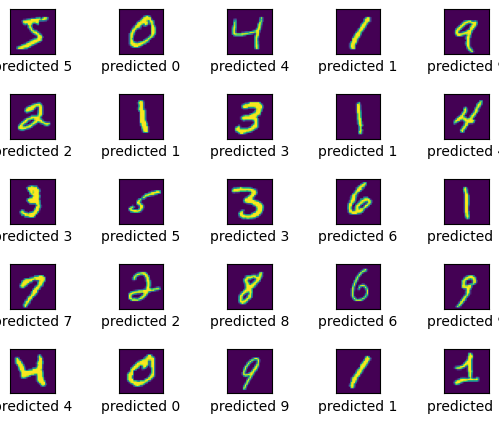

In [51]:
# grafique 25 (5 x 5) imagenes
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.9)
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_x[i])
    plt.xlabel("predicted {}".format(pred[i]))

plt.show();

In [52]:
pred[0:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1])

In [53]:
predtest = predictunoVsResto(all_theta, nttest_x)
print('Testing Set Accuracy: {:.2f}%'.format(np.mean(predtest == test_y) * 100))

Testing Set Accuracy: 91.84%


Grafique las primeras 25 muestras de los datos de prueba en una matriz
de 5x5 como se hizo arriba

In [54]:
lambda_ = 0.1
num_labels=10
all_theta_test = unoVsResto(nttest_x, test_y, num_labels, lambda_)

test_pred = predictunoVsResto(all_theta_test, nttest_x)

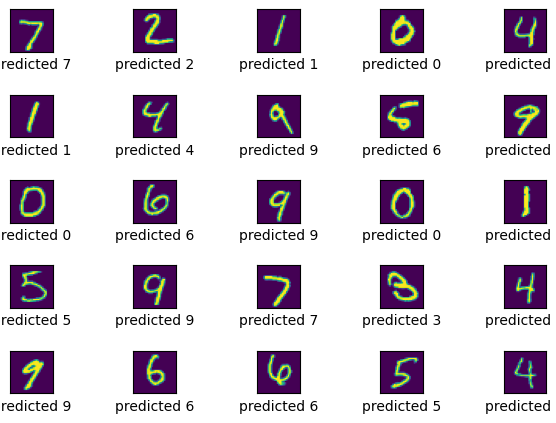

In [59]:
# grafique 25 (5 x 5) imagenes
#====================Su codigo aca============================

# grafique 25 (5 x 5) imagenes
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.5,
                    hspace=1)
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_x[i])
    plt.xlabel("predicted {}".format(test_pred[i]))

plt.show();
# =============================================================
#El resultado debe ser similar al obtenido abajo)